In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# loading WESAD data
subject_ids = [f"S{i}" for i in range(2, 18) if i not in [1, 12]]  
dfs = []

for sid in subject_ids:
    df = pd.read_csv(f"Processed WESAD Data/Processed_{sid}_data_unnormalised_new.csv")
    dfs.append(df)

wesad_data = pd.concat(dfs, ignore_index=True)
wesad_data = wesad_data.rename(columns={"Label":"Stress Label"})
wesad_data

,Participant ID,Filtered EDA Mean,Filtered EDA Standard Deviation,SCL Mean,SCL Standard Deviation,SCR Mean,SCR Standard Deviation,HRV (RMSSD),HRV (SDNN),HR (bpm),TEMP Mean,TEMP Standard Deviation,TEMP Slope,TEMP Range,Stress Label
0,2,1.319926,0.158933,1.311394,0.097091,0.048811,0.055282,227.981315,172.109971,85.243129,35.810000,0.022730,-0.000183,0.12,0
1,2,1.148486,0.123709,1.154106,0.116166,0.023503,0.031501,212.441958,170.307538,79.455212,35.768000,0.049322,-0.000651,0.21,0
2,2,0.969361,0.161578,0.967142,0.149690,0.011604,0.015669,184.233470,152.013695,78.617389,35.719333,0.036600,-0.000422,0.15,0
3,2,0.780818,0.099444,0.784546,0.106375,0.004581,0.006427,159.404043,153.345582,78.572928,35.708333,0.023464,0.000215,0.09,0
4,2,0.656155,0.073471,0.654764,0.072738,0.004088,0.006014,125.189743,136.537417,74.573025,35.744167,0.038828,0.000520,0.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,17,1.085934,0.014432,1.085905,0.004904,0.003564,0.010046,107.596426,98.159150,125.852124,32.333167,0.070699,0.000994,0.27,1
1100,17,1.083978,0.007285,1.084305,0.005482,0.001510,0.003488,118.036298,116.497528,119.685699,32.427667,0.063715,0.000900,0.24,1
1101,17,1.075400,0.008162,1.075364,0.006820,0.001835,0.004210,152.322806,126.263518,112.021025,32.530750,0.076981,0.001091,0.26,1
1102,17,1.065623,0.011943,1.064553,0.008547,0.003008,0.004770,160.252394,131.740600,108.012618,32.616167,0.055230,0.000719,0.22,1


In [4]:
# loading affective_data
subject_ids = [f"Drv_{i}" for i in range(1, 14) if i != 2]  
affective_data = {}

for sid in subject_ids:
    left = pd.read_csv(f"Processed AffectiveROAD Data/{sid}_left_data_unnormalised_.csv")
    right = pd.read_csv(f"Processed AffectiveROAD Data/{sid}_right_data_unnormalised_.csv")
    combined = pd.concat([left, right], ignore_index=True)
    affective_data[sid] = combined

affective_data['Drv_1']

,Participant ID,Wrist,Filtered EDA Mean,Filtered EDA Standard Deviation,SCL Mean,SCL Standard Deviation,SCR Mean,SCR Standard Deviation,HRV (RMSSD),HRV (SDNN),HR (bpm),TEMP Mean,TEMP Standard Deviation,TEMP Slope,TEMP Range,Stress Label
0,1,Left,5.219569,0.231495,5.218068,0.152462,0.044282,0.095538,186.782481,170.410122,71.521511,34.825917,0.017078,0.000161,0.08,0.0
1,1,Left,5.388524,0.236291,5.375866,0.160373,0.051729,0.095987,130.869533,93.075210,67.794466,34.830583,0.015906,0.000006,0.06,0.0
2,1,Left,5.279265,0.386605,5.255102,0.309213,0.058357,0.100687,181.555839,127.773168,71.092304,34.817583,0.025674,-0.000321,0.10,0.0
3,1,Left,4.801925,0.395216,4.806559,0.367729,0.027595,0.051054,141.964733,108.598740,70.477189,34.805083,0.019386,-0.000005,0.07,0.0
4,1,Left,4.394909,0.180730,4.397087,0.199027,0.010146,0.014696,84.467369,61.161047,68.788198,34.811667,0.021422,0.000250,0.07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,Right,2.808709,0.166746,2.809205,0.160343,0.008685,0.013871,158.567781,105.902209,90.995261,34.356333,0.139546,-0.001966,0.40,1.0
76,1,Right,3.631054,0.132800,3.600742,0.070711,0.049462,0.086135,21.949279,31.387660,77.002639,36.735333,0.072272,0.001008,0.24,1.0
77,1,Right,3.740914,0.307837,3.833648,0.423779,0.030531,0.076302,56.221057,58.151319,76.699080,36.795583,0.028731,0.000258,0.14,1.0
78,1,Right,4.914828,0.379760,4.912760,0.323356,0.031633,0.102330,24.838477,32.150903,75.729687,36.727250,0.030454,-0.000014,0.11,1.0


In [17]:
affective_df_list = []

for sid, df in affective_data.items():
    temp = df.copy()
    temp['Participant ID'] = sid
    affective_df_list.append(temp)

affective_df = pd.concat(affective_df_list, ignore_index=True)
affective_df = affective_df.drop(columns=['Wrist'])

affective_df

,Participant ID,Filtered EDA Mean,Filtered EDA Standard Deviation,SCL Mean,SCL Standard Deviation,SCR Mean,SCR Standard Deviation,HRV (RMSSD),HRV (SDNN),HR (bpm),TEMP Mean,TEMP Standard Deviation,TEMP Slope,TEMP Range,Stress Label
0,Drv_1,5.219569,0.231495,5.218068,0.152462,0.044282,0.095538,186.782481,170.410122,71.521511,34.825917,0.017078,0.000161,0.08,0.0
1,Drv_1,5.388524,0.236291,5.375866,0.160373,0.051729,0.095987,130.869533,93.075210,67.794466,34.830583,0.015906,0.000006,0.06,0.0
2,Drv_1,5.279265,0.386605,5.255102,0.309213,0.058357,0.100687,181.555839,127.773168,71.092304,34.817583,0.025674,-0.000321,0.10,0.0
3,Drv_1,4.801925,0.395216,4.806559,0.367729,0.027595,0.051054,141.964733,108.598740,70.477189,34.805083,0.019386,-0.000005,0.07,0.0
4,Drv_1,4.394909,0.180730,4.397087,0.199027,0.010146,0.014696,84.467369,61.161047,68.788198,34.811667,0.021422,0.000250,0.07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,Drv_13,13.501897,0.205686,13.504722,0.196827,0.006700,0.012932,109.385146,66.273623,112.109416,34.249833,0.060346,0.000825,0.24,0.0
1012,Drv_13,13.247854,0.145769,13.245171,0.160778,0.010223,0.014234,136.683420,96.363473,110.720839,34.358167,0.095490,0.001357,0.29,0.0
1013,Drv_13,12.995547,0.194596,12.998213,0.180169,0.010199,0.015012,120.864059,87.548987,111.245720,34.461500,0.062392,0.000768,0.22,0.0
1014,Drv_13,12.732407,0.187090,12.752800,0.166675,0.005723,0.013655,141.713891,88.934392,111.348763,34.520167,0.029524,0.000303,0.12,0.0


In [18]:
wesad_data['Dataset'] = 'WESAD'
affective_df['Dataset'] = 'AffectiveROAD'

df = pd.concat([wesad_data, affective_df], ignore_index=True)

df

,Participant ID,Filtered EDA Mean,Filtered EDA Standard Deviation,SCL Mean,SCL Standard Deviation,SCR Mean,SCR Standard Deviation,HRV (RMSSD),HRV (SDNN),HR (bpm),TEMP Mean,TEMP Standard Deviation,TEMP Slope,TEMP Range,Stress Label,Dataset
0,2,1.319926,0.158933,1.311394,0.097091,0.048811,0.055282,227.981315,172.109971,85.243129,35.810000,0.022730,-0.000183,0.12,0.0,WESAD
1,2,1.148486,0.123709,1.154106,0.116166,0.023503,0.031501,212.441958,170.307538,79.455212,35.768000,0.049322,-0.000651,0.21,0.0,WESAD
2,2,0.969361,0.161578,0.967142,0.149690,0.011604,0.015669,184.233470,152.013695,78.617389,35.719333,0.036600,-0.000422,0.15,0.0,WESAD
3,2,0.780818,0.099444,0.784546,0.106375,0.004581,0.006427,159.404043,153.345582,78.572928,35.708333,0.023464,0.000215,0.09,0.0,WESAD
4,2,0.656155,0.073471,0.654764,0.072738,0.004088,0.006014,125.189743,136.537417,74.573025,35.744167,0.038828,0.000520,0.17,0.0,WESAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,Drv_13,13.501897,0.205686,13.504722,0.196827,0.006700,0.012932,109.385146,66.273623,112.109416,34.249833,0.060346,0.000825,0.24,0.0,AffectiveROAD
2116,Drv_13,13.247854,0.145769,13.245171,0.160778,0.010223,0.014234,136.683420,96.363473,110.720839,34.358167,0.095490,0.001357,0.29,0.0,AffectiveROAD
2117,Drv_13,12.995547,0.194596,12.998213,0.180169,0.010199,0.015012,120.864059,87.548987,111.245720,34.461500,0.062392,0.000768,0.22,0.0,AffectiveROAD
2118,Drv_13,12.732407,0.187090,12.752800,0.166675,0.005723,0.013655,141.713891,88.934392,111.348763,34.520167,0.029524,0.000303,0.12,0.0,AffectiveROAD


In [19]:
feature_cols = [c for c in df.columns if c not in ['Participant ID', 'Stress Label', 'Dataset']]
features = ['Filtered EDA Mean', 'SCL Mean', 'SCR Mean', 'HRV (RMSSD)', 'HRV (SDNN)', 'HR (bpm)', 'TEMP Mean']
features


['Filtered EDA Mean',
 'SCL Mean',
 'SCR Mean',
 'HRV (RMSSD)',
 'HRV (SDNN)',
 'HR (bpm)',
 'TEMP Mean']

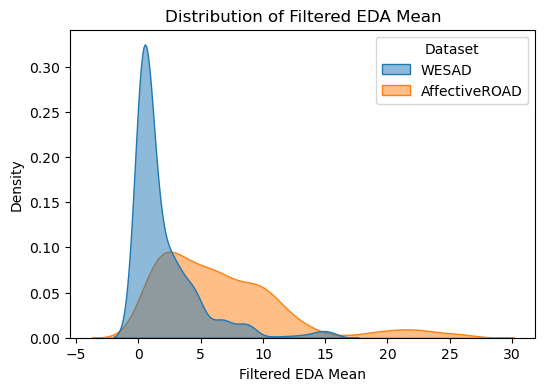

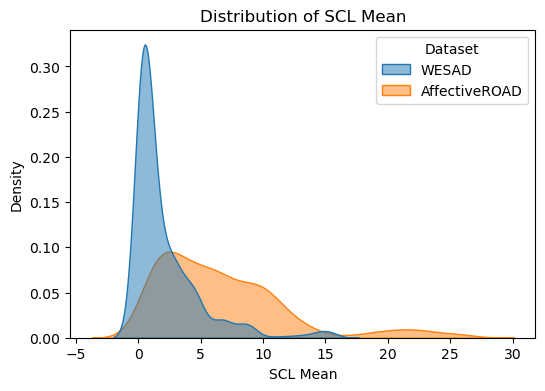

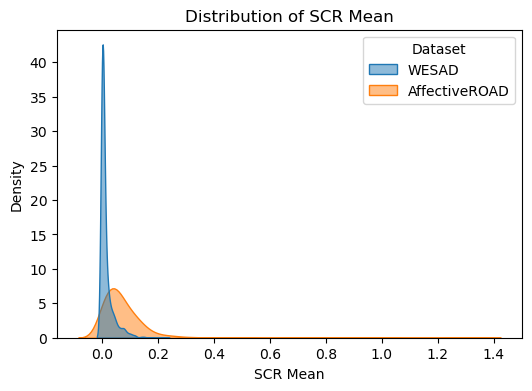

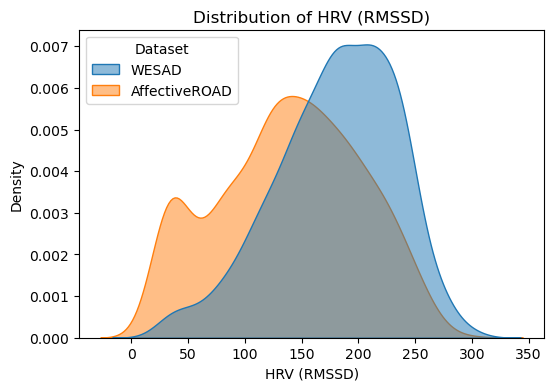

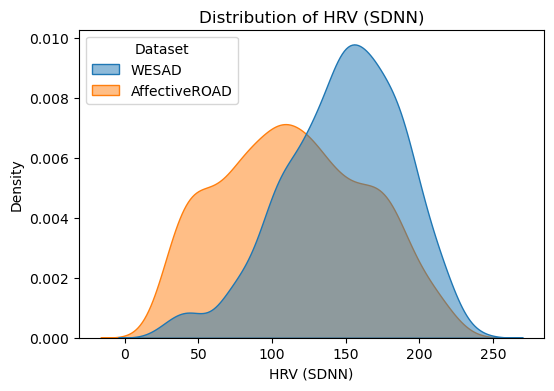

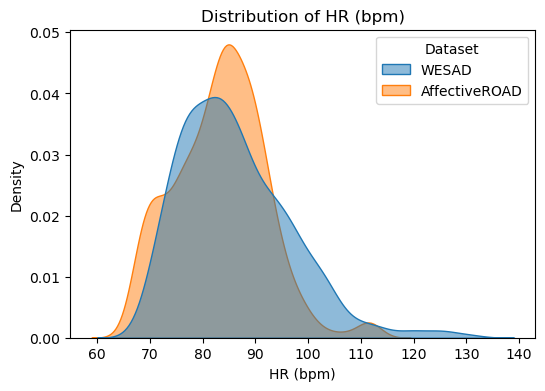

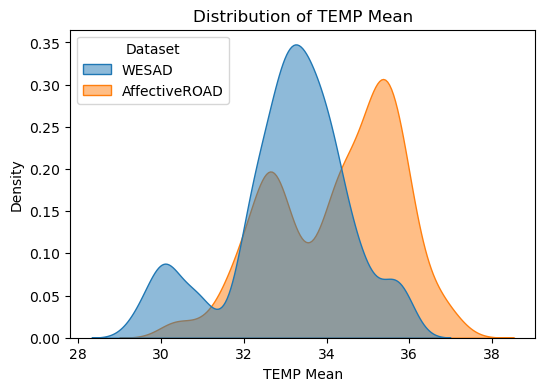

In [20]:
for feat in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feat, hue="Dataset", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {feat}")
    plt.show()

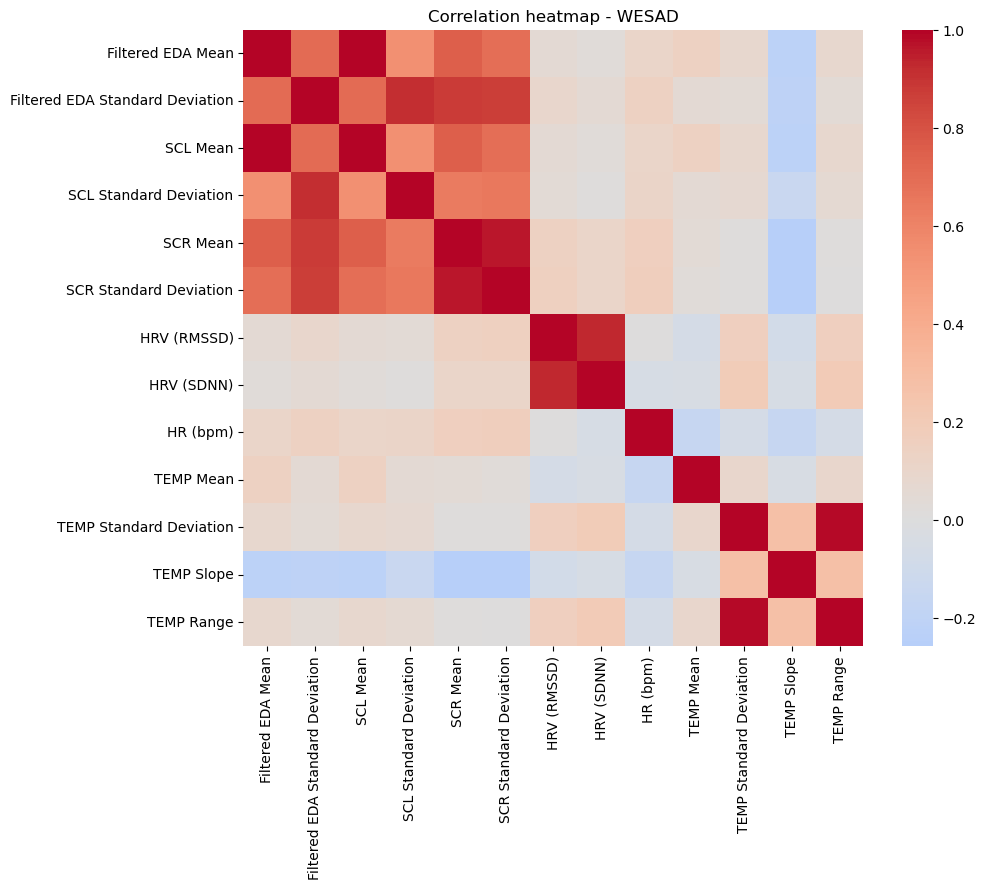

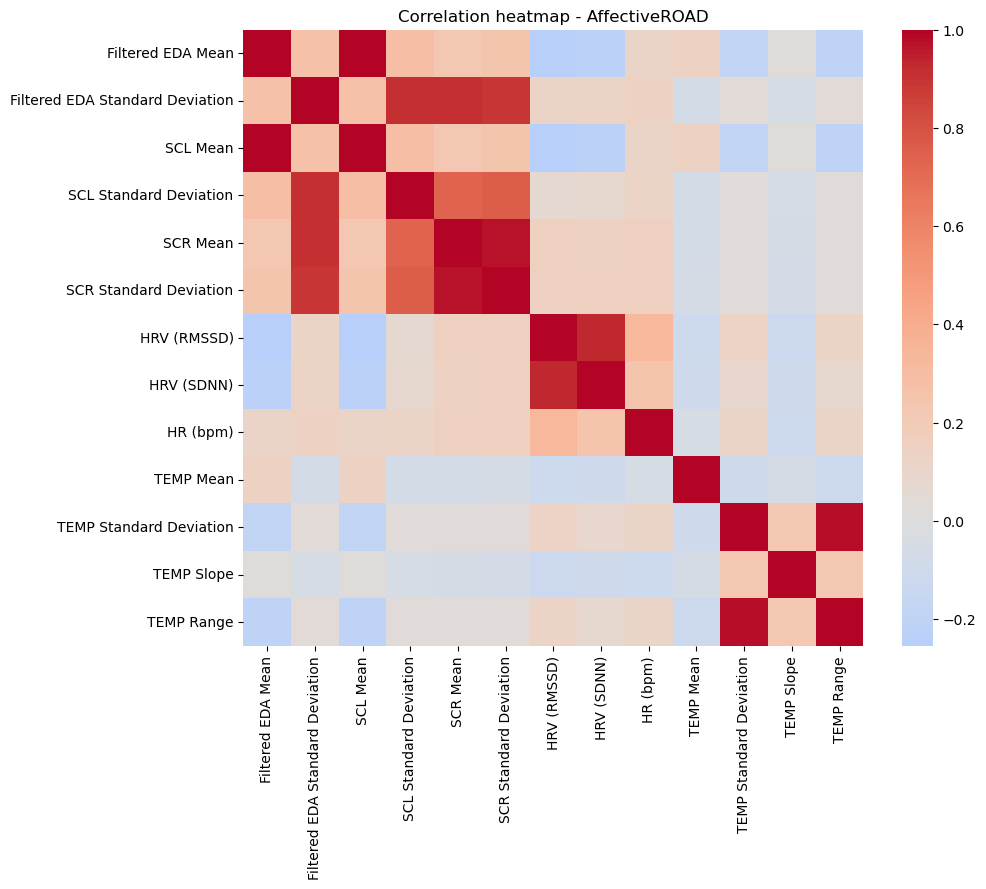

In [21]:
for dataset in df['Dataset'].unique():
    corr = df[df['Dataset']==dataset][feature_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title(f"Correlation heatmap - {dataset}")
    plt.savefig(f"appendix_correlation_heatmap_{dataset}.png", dpi=300)
    plt.show()

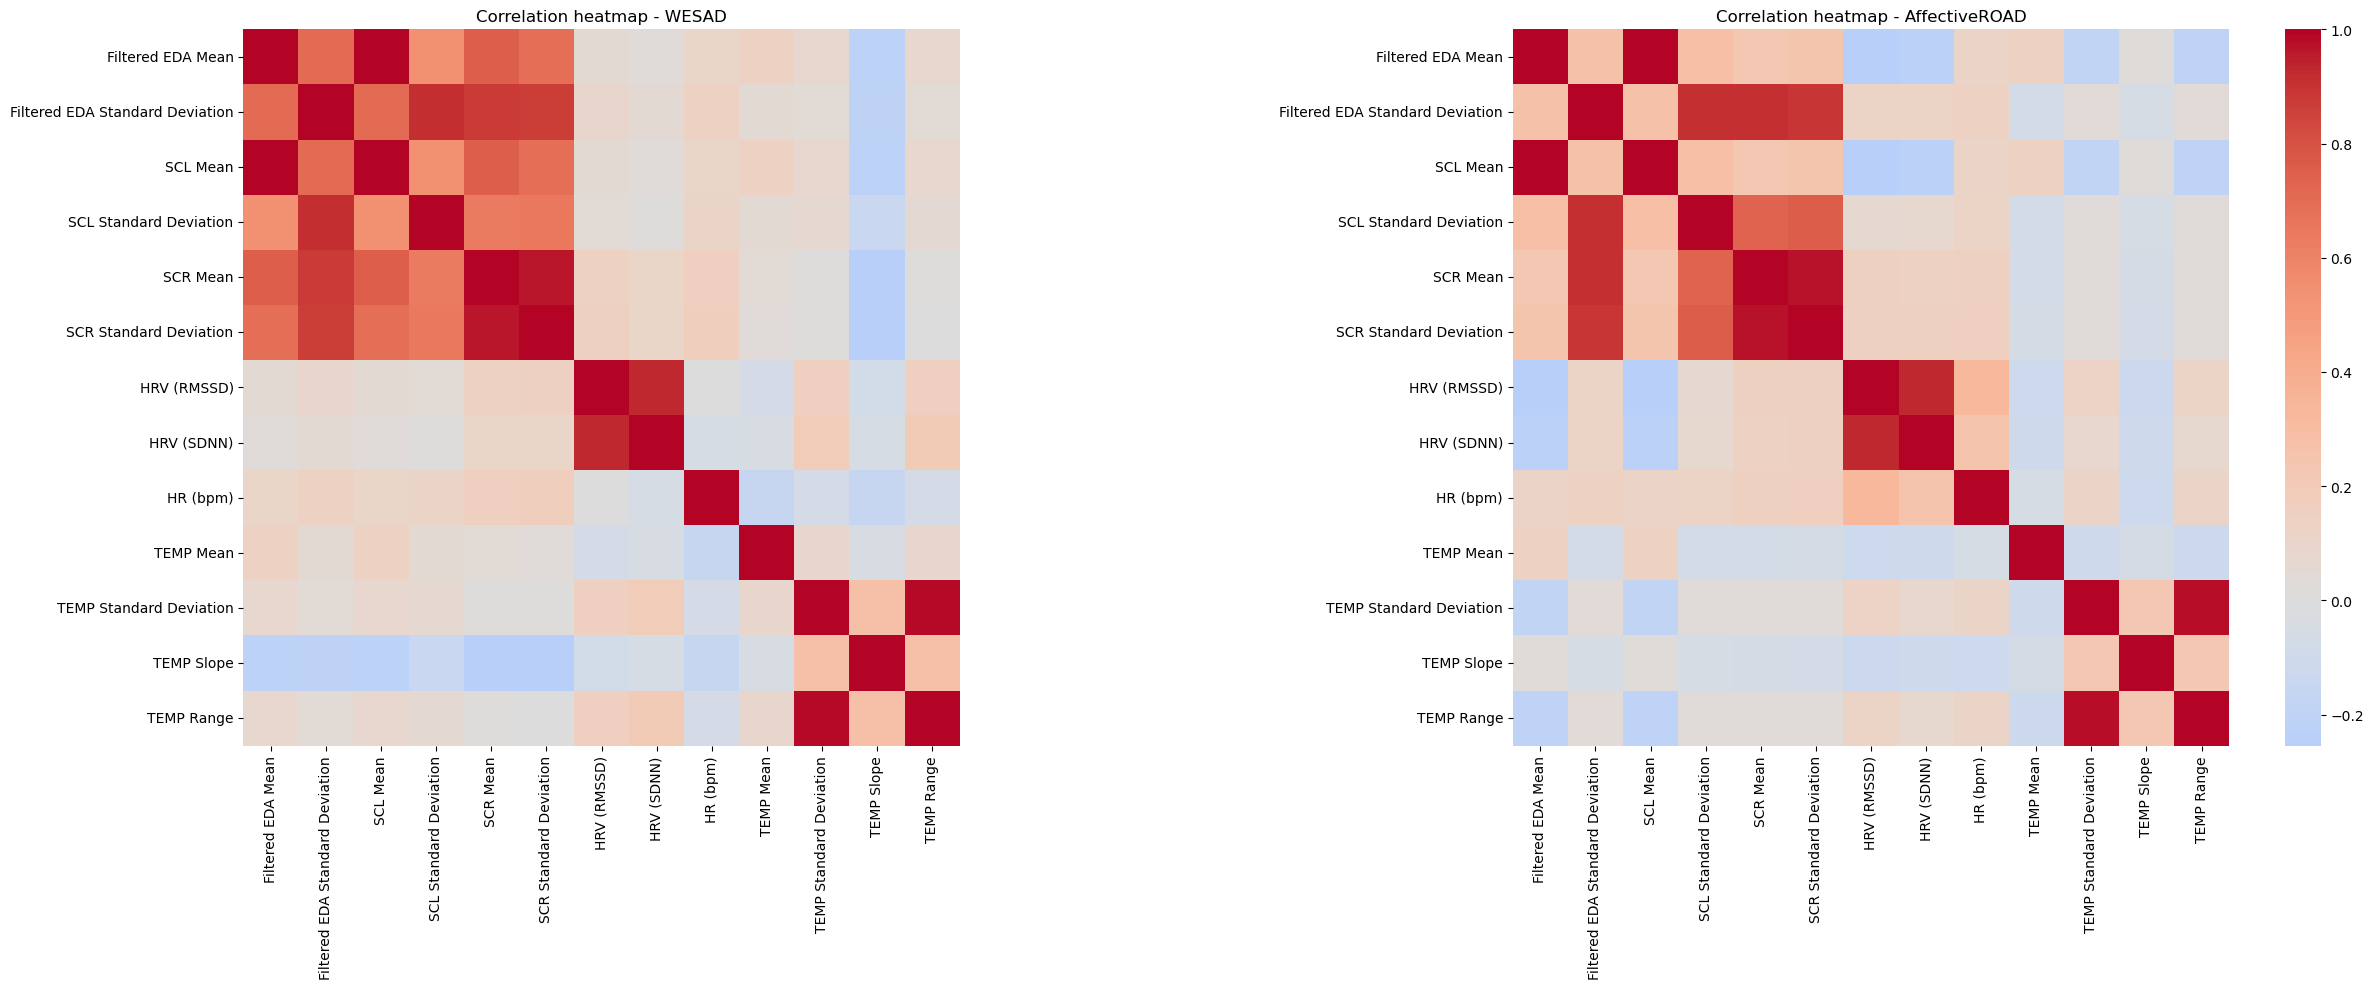

In [22]:
datasets = df['Dataset'].unique()

fig, axes = plt.subplots(1, len(datasets), figsize=(26, 10))

for ax, dataset in zip(axes, datasets):
    corr = df[df['Dataset'] == dataset][feature_cols].corr()
    sns.heatmap(corr, cmap="coolwarm", center=0, ax=ax, cbar=(ax == axes[-1]), square=True)
    ax.set_title(f"Correlation heatmap - {dataset}")

plt.tight_layout()
plt.savefig("appendix_correlation_heatmaps.png", dpi=300)
plt.show()


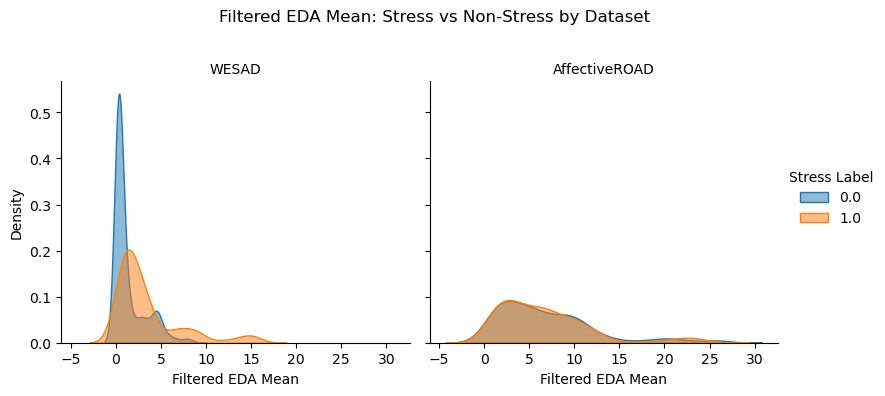

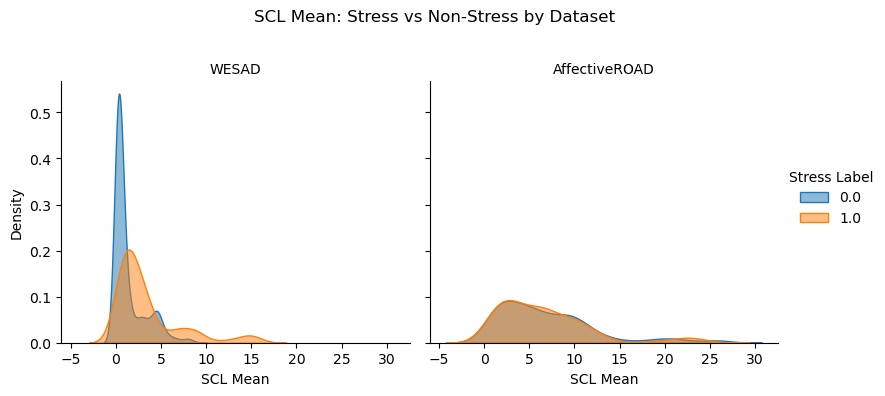

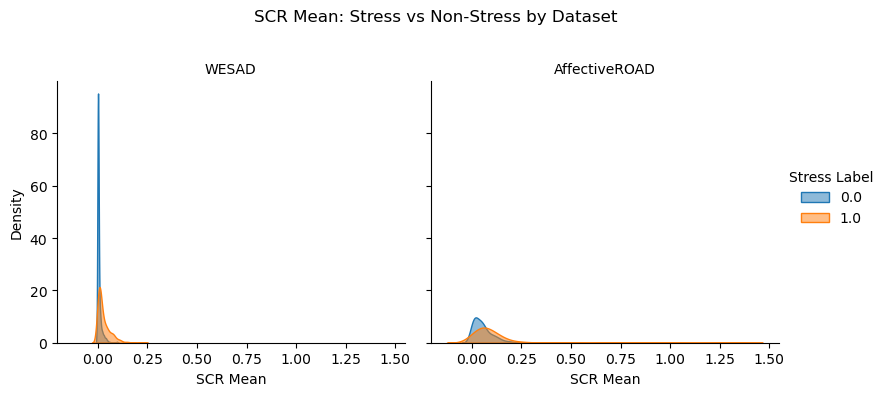

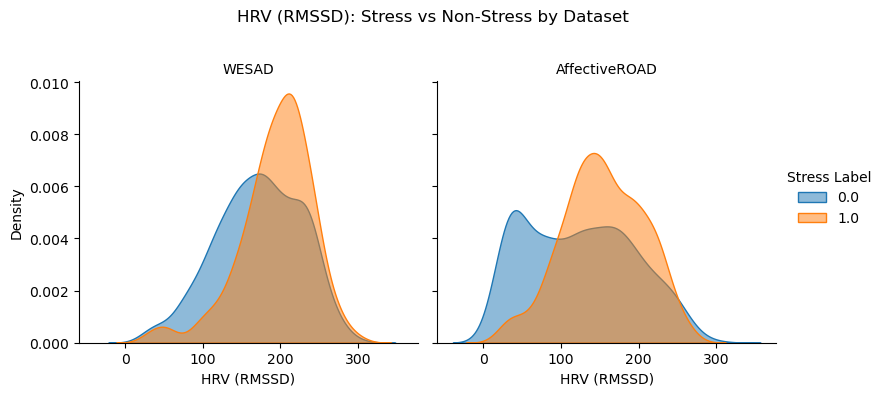

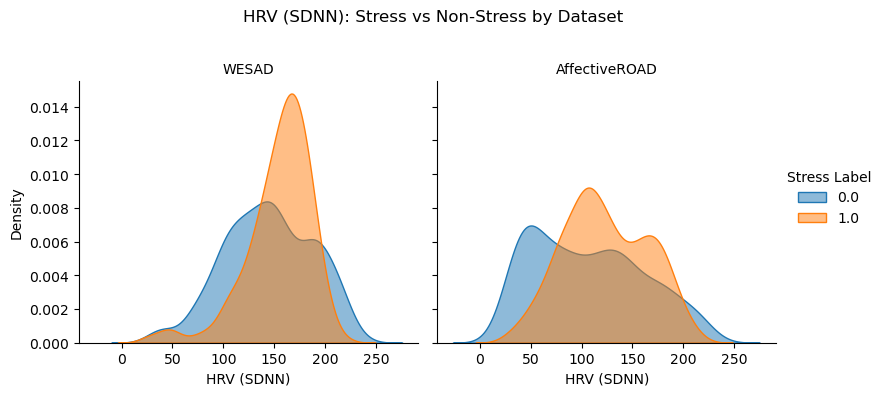

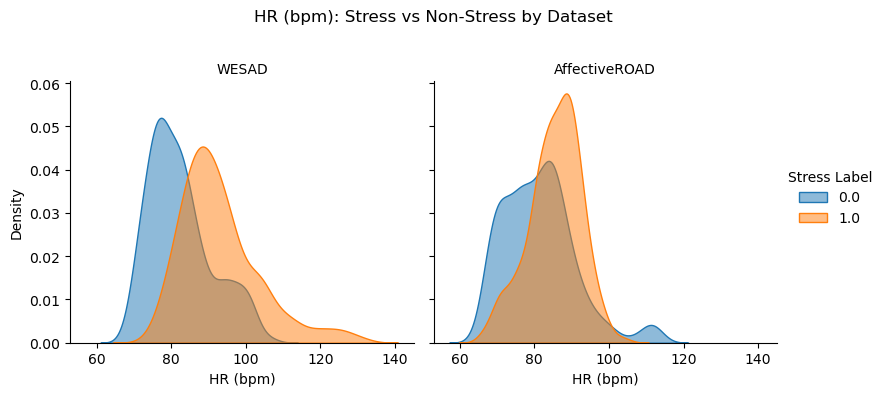

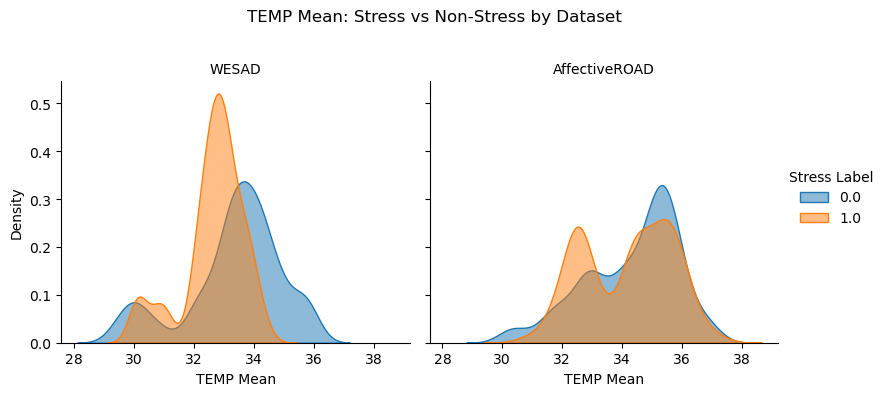

In [ ]:
for feat in features:
    g = sns.FacetGrid(df, col="Dataset", hue="Stress Label", sharex=True, sharey=True, height=4)
    g.map(sns.kdeplot, feat, fill=True, alpha=0.5)
    g.add_legend()
    g.set_titles(col_template="{col_name}")
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(f"{feat}: Stress vs Non-Stress by Dataset")
    plt.show()

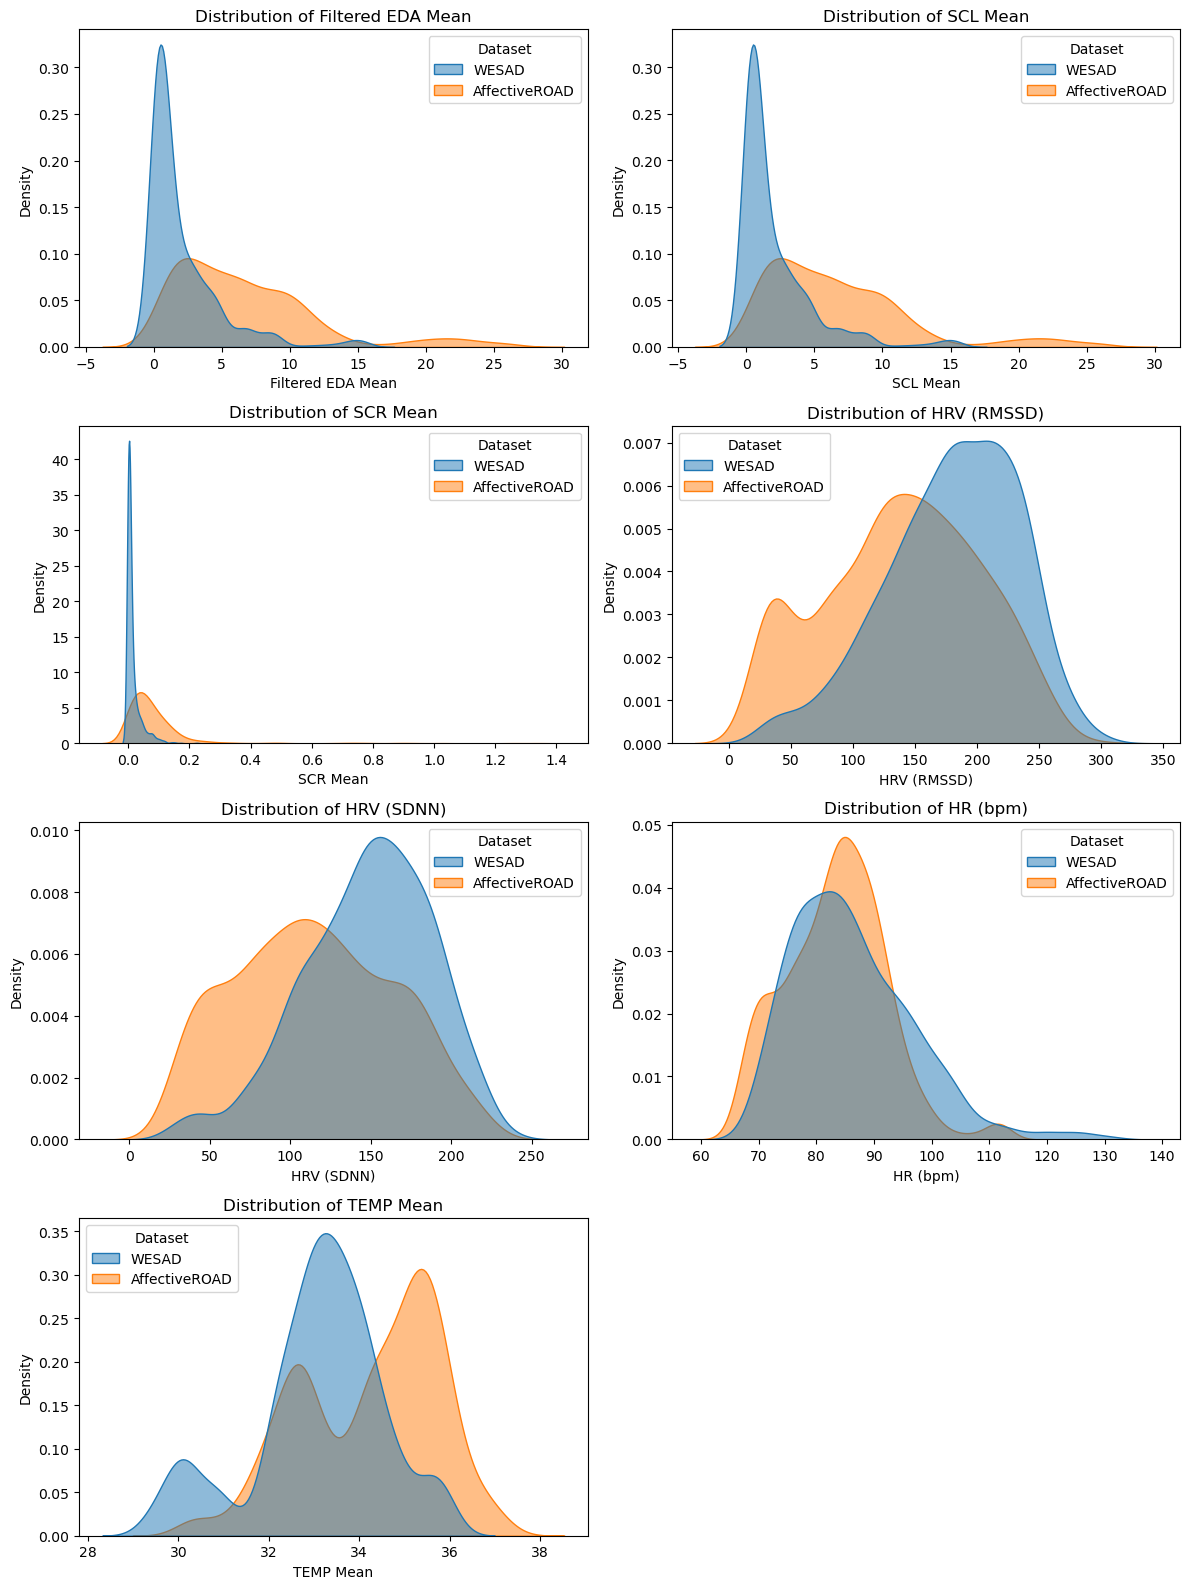

In [28]:
n_features = len(features)

n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten() 

for i, feat in enumerate(features):
    sns.kdeplot(data=df, x=feat, hue="Dataset", fill=True,
                common_norm=False, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Distribution of {feat}")

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig("appendix_kde_grid.png", dpi=300)
plt.show()

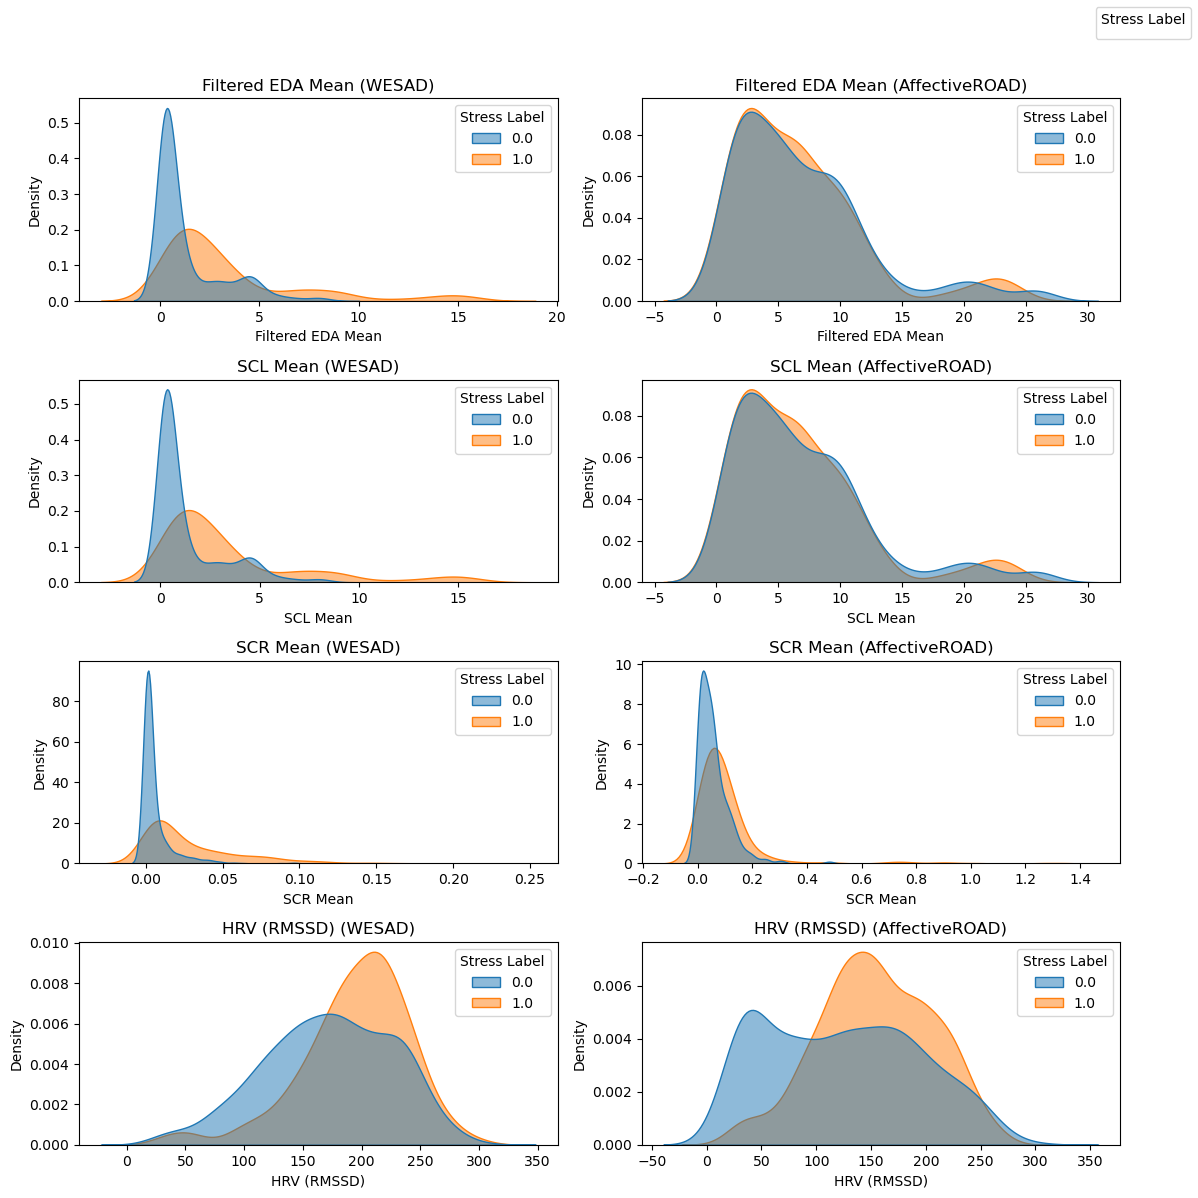

In [ ]:


features_group1 = features[:4]  
datasets = df['Dataset'].unique()

fig, axes = plt.subplots(len(features_group1), 2, figsize=(12, 3*len(features_group1)))  

for i, feat in enumerate(features_group1):
    for j, dataset in enumerate(datasets):
        df_subset = df[df['Dataset'] == dataset]
        sns.kdeplot(
            data=df_subset,
            x=feat,
            hue="Stress Label",
            fill=True,
            common_norm=False,
            alpha=0.5,
            ax=axes[i, j]
        )
        axes[i, j].set_title(f"{feat} ({dataset})")

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, title="Stress Label", loc='upper right')

plt.tight_layout(rect=[0, 0, 0.95, 0.95])  
plt.savefig("appendix_kde_group1_stress_sidebyside.png", dpi=300)
plt.show()

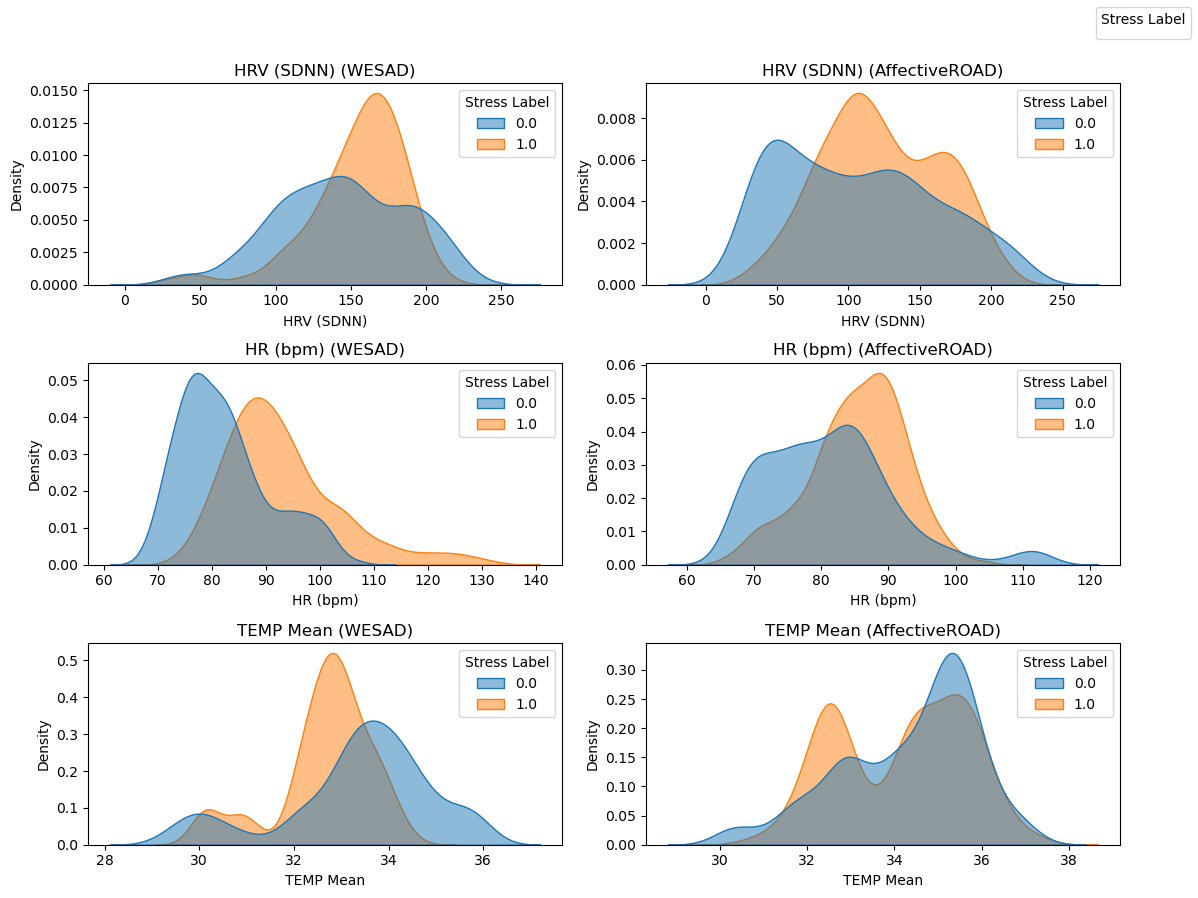

In [ ]:
features_group1 = features[4:]  
datasets = df['Dataset'].unique()

fig, axes = plt.subplots(len(features_group1), 2, figsize=(12, 3*len(features_group1)))  

for i, feat in enumerate(features_group1):
    for j, dataset in enumerate(datasets):
        df_subset = df[df['Dataset'] == dataset]
        sns.kdeplot(
            data=df_subset,
            x=feat,
            hue="Stress Label",
            fill=True,
            common_norm=False,
            alpha=0.5,
            ax=axes[i, j]
        )
        axes[i, j].set_title(f"{feat} ({dataset})")

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, title="Stress Label", loc='upper right')

plt.tight_layout(rect=[0, 0, 0.95, 0.95]) 
plt.savefig("appendix_kde_group2_stress_sidebyside.png", dpi=300)
plt.show()